In [1]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import sys
from PIL import Image
import functools
from copy import deepcopy

In [2]:
# k : list of the dimension of the compressed image
# accu : accuracy
k = []
accu = []
#path of the initial images and compressed images- empty initially
imgs = '/home/kartic/Documents/ML/PCA Assignment/images'
compr = '/home/kartic/Documents/ML/PCA Assignment/compressed'
# NOTE : YOU HAVE TO CHANGE THE PATH ACCORDING TO YOUR DIRECTORY

In [3]:
# CASE 1: WHEN K = 2
height = 2
width = 2

imgfiles = os.listdir(imgs)
# IMAGE RESIZING
for img in imgfiles:
    path = os.path.join(imgs,img)
    newPath = os.path.join(compr,img)
    image = Image.open(path)
    image = image.resize((height,width),Image.ANTIALIAS)
    image.save(newPath)
    
#REDUCTION AND CONSTRUCTION OF DATASET
output = []
outputID = {}
outputName = {}

inp = []
newImgFiles = os.listdir(compr)

for newImg in newImgFiles:
    imgPath = os.path.join(compr,newImg)
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    inp.append(image)
    
    name = newImg.split("_")[0]
    if(name not in outputID):
        var = len(outputID) + 1
        outputID[name] = var
        outputName[var] = name
    output.append(outputID[name])
    
output = np.array(output)
inp = np.array(inp)

mu = np.mean(inp,axis = 0)

# DIVIDING THE DATASET INTO TRAINING SET
trainingX = []
testingX = []
testingY = []
trainingY = []

# TRAINING SET = 60% & TESTING SET = 40%
trainSize = 60
sampleSize = int((trainSize/float(100))*inp.shape[0])
trainingIdx = random.sample(range(0,inp.shape[0]),sampleSize)

for i in range(inp.shape[0]):
    if(i in trainingIdx):
        trainingX.append(inp[i])
        trainingY.append(output[i])
    else:
        testingX.append(inp[i])
        testingY.append(output[i])
        
trainingX = np.array(trainingX)
testingX = np.array(testingX)
testingY = np.array(testingY)
trainingY = np.array(trainingY)

# FEATURE SCALING
mutrain = np.mean(trainingX,axis = 0)
trainingX = trainingX - mutrain

xTestCompr = deepcopy(testingX)
mutest = np.mean(testingX,axis = 0)
testingX = testingX - mutest

# FINDING COVARIANCE MATRIX
cov = (1 / float(trainingX.shape[0])) * np.dot(np.transpose(trainingX), trainingX)

# FINDING THE OPTIMAL K VALUE
U,S,V = np.linalg.svd(cov)
totSum = 0
for i in range(S.shape[0]):
    totSum = totSum + S[i]
Sum = 0
for i in range(S.shape[0]):
    Sum = Sum + S[i]
    value = float(Sum)/float(totSum)
    if(value>= 0.99):
        K = i + 1
        break
        
# CALCULATION OF EIGEN VECTORS
EigenVect = []
for i in range(K):
    EigenVect.append(U[:,i])
EigenVect = np.array(EigenVect)

EigenFaces = np.dot(trainingX,np.transpose(EigenVect))
projectedData = np.dot(testingX,np.transpose(EigenVect))
trainingX = EigenFaces
testingX = projectedData

#TESTING

pred = []

for i in range(testingX.shape[0]):
    minDist = -1
    for j in range(trainingX.shape[0]):
        dist = np.linalg.norm(trainingX[j] - testingX[i])
        if(minDist == -1 or minDist > dist):
            minDist = dist
            lab = trainingY[j]
    pred.append(lab)
    
for i in range(testingX.shape[0]):
    print("Actual: " + outputName[testingY[i]] + " , Predicted: " + outputName[pred[i]])
    
count = 0
for i in range(testingX.shape[0]):
    if(pred[i] == testingY[i]):
        count += 1
print("Total Correct Ones are: ", count , "Out of :", testingX.shape[0] , "Testing Samples")
print("Accuracy of our Model is: ", (count/testingX.shape[0])*100)
k.append(height)
accu.append((count/testingX.shape[0])*100)

Actual: s29 , Predicted: s31
Actual: s16 , Predicted: s16
Actual: s3 , Predicted: s32
Actual: s34 , Predicted: s34
Actual: s32 , Predicted: s3
Actual: s2 , Predicted: s11
Actual: s11 , Predicted: s11
Actual: s19 , Predicted: s19
Actual: s27 , Predicted: s27
Actual: s19 , Predicted: s19
Actual: s39 , Predicted: s39
Actual: s40 , Predicted: s35
Actual: s27 , Predicted: s27
Actual: s38 , Predicted: s23
Actual: s36 , Predicted: s36
Actual: s37 , Predicted: s37
Actual: s31 , Predicted: s31
Actual: s18 , Predicted: s32
Actual: s15 , Predicted: s15
Actual: s38 , Predicted: s23
Actual: s20 , Predicted: s30
Actual: s25 , Predicted: s25
Actual: s33 , Predicted: s30
Actual: s31 , Predicted: s29
Actual: s24 , Predicted: s10
Actual: s1 , Predicted: s32
Actual: s14 , Predicted: s37
Actual: s40 , Predicted: s40
Actual: s29 , Predicted: s33
Actual: s37 , Predicted: s37
Actual: s8 , Predicted: s8
Actual: s36 , Predicted: s36
Actual: s36 , Predicted: s36
Actual: s28 , Predicted: s26
Actual: s9 , Predict

In [4]:
# CASE 2: WHEN K = 4
height = 4
width = 4

imgfiles = os.listdir(imgs)
# IMAGE RESIZING
for img in imgfiles:
    path = os.path.join(imgs,img)
    newPath = os.path.join(compr,img)
    image = Image.open(path)
    image = image.resize((height,width),Image.ANTIALIAS)
    image.save(newPath)
    
#REDUCTION AND CONSTRUCTION OF DATASET
output = []
outputID = {}
outputName = {}

inp = []
newImgFiles = os.listdir(compr)

for newImg in newImgFiles:
    imgPath = os.path.join(compr,newImg)
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    inp.append(image)
    
    name = newImg.split("_")[0]
    if(name not in outputID):
        var = len(outputID) + 1
        outputID[name] = var
        outputName[var] = name
    output.append(outputID[name])
    
output = np.array(output)
inp = np.array(inp)

mu = np.mean(inp,axis = 0)

# DIVIDING THE DATASET INTO TRAINING SET
trainingX = []
testingX = []
testingY = []
trainingY = []

# TRAINING SET = 60% & TESTING SET = 40%
trainSize = 60
sampleSize = int((trainSize/float(100))*inp.shape[0])
trainingIdx = random.sample(range(0,inp.shape[0]),sampleSize)

for i in range(inp.shape[0]):
    if(i in trainingIdx):
        trainingX.append(inp[i])
        trainingY.append(output[i])
    else:
        testingX.append(inp[i])
        testingY.append(output[i])
        
trainingX = np.array(trainingX)
testingX = np.array(testingX)
testingY = np.array(testingY)
trainingY = np.array(trainingY)

# FEATURE SCALING
mutrain = np.mean(trainingX,axis = 0)
trainingX = trainingX - mutrain

xTestCompr = deepcopy(testingX)
mutest = np.mean(testingX,axis = 0)
testingX = testingX - mutest

# FINDING COVARIANCE MATRIX
cov = (1 / float(trainingX.shape[0])) * np.dot(np.transpose(trainingX), trainingX)

# FINDING THE OPTIMAL K VALUE
U,S,V = np.linalg.svd(cov)
totSum = 0
for i in range(S.shape[0]):
    totSum = totSum + S[i]
Sum = 0
for i in range(S.shape[0]):
    Sum = Sum + S[i]
    value = float(Sum)/float(totSum)
    if(value>= 0.99):
        K = i + 1
        break
        
# CALCULATION OF EIGEN VECTORS
EigenVect = []
for i in range(K):
    EigenVect.append(U[:,i])
EigenVect = np.array(EigenVect)

EigenFaces = np.dot(trainingX,np.transpose(EigenVect))
projectedData = np.dot(testingX,np.transpose(EigenVect))
trainingX = EigenFaces
testingX = projectedData

#TESTING

pred = []

for i in range(testingX.shape[0]):
    minDist = -1
    for j in range(trainingX.shape[0]):
        dist = np.linalg.norm(trainingX[j] - testingX[i])
        if(minDist == -1 or minDist > dist):
            minDist = dist
            lab = trainingY[j]
    pred.append(lab)
    
for i in range(testingX.shape[0]):
    print("Actual: " + outputName[testingY[i]] + " , Predicted: " + outputName[pred[i]])
    
count = 0
for i in range(testingX.shape[0]):
    if(pred[i] == testingY[i]):
        count += 1
print("Total Correct Ones are: ", count , "Out of :", testingX.shape[0] , "Testing Samples")
print("Accuracy of our Model is: ", (count/testingX.shape[0])*100)
k.append(height)
accu.append((count/testingX.shape[0])*100)

Actual: s29 , Predicted: s29
Actual: s16 , Predicted: s16
Actual: s8 , Predicted: s8
Actual: s3 , Predicted: s4
Actual: s10 , Predicted: s10
Actual: s2 , Predicted: s2
Actual: s23 , Predicted: s23
Actual: s32 , Predicted: s15
Actual: s29 , Predicted: s29
Actual: s12 , Predicted: s12
Actual: s33 , Predicted: s33
Actual: s7 , Predicted: s7
Actual: s35 , Predicted: s35
Actual: s13 , Predicted: s13
Actual: s39 , Predicted: s39
Actual: s23 , Predicted: s23
Actual: s21 , Predicted: s21
Actual: s1 , Predicted: s1
Actual: s24 , Predicted: s24
Actual: s32 , Predicted: s32
Actual: s37 , Predicted: s37
Actual: s36 , Predicted: s36
Actual: s31 , Predicted: s31
Actual: s15 , Predicted: s15
Actual: s18 , Predicted: s18
Actual: s3 , Predicted: s4
Actual: s14 , Predicted: s14
Actual: s19 , Predicted: s19
Actual: s24 , Predicted: s24
Actual: s28 , Predicted: s28
Actual: s20 , Predicted: s20
Actual: s25 , Predicted: s25
Actual: s23 , Predicted: s23
Actual: s33 , Predicted: s30
Actual: s22 , Predicted: s

In [5]:
# CASE 3: WHEN K = 8
height = 8
width = 8

imgfiles = os.listdir(imgs)
# IMAGE RESIZING
for img in imgfiles:
    path = os.path.join(imgs,img)
    newPath = os.path.join(compr,img)
    image = Image.open(path)
    image = image.resize((height,width),Image.ANTIALIAS)
    image.save(newPath)
    
#REDUCTION AND CONSTRUCTION OF DATASET
output = []
outputID = {}
outputName = {}

inp = []
newImgFiles = os.listdir(compr)

for newImg in newImgFiles:
    imgPath = os.path.join(compr,newImg)
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    inp.append(image)
    
    name = newImg.split("_")[0]
    if(name not in outputID):
        var = len(outputID) + 1
        outputID[name] = var
        outputName[var] = name
    output.append(outputID[name])
    
output = np.array(output)
inp = np.array(inp)

mu = np.mean(inp,axis = 0)

# DIVIDING THE DATASET INTO TRAINING SET
trainingX = []
testingX = []
testingY = []
trainingY = []

# TRAINING SET = 60% & TESTING SET = 40%
trainSize = 60
sampleSize = int((trainSize/float(100))*inp.shape[0])
trainingIdx = random.sample(range(0,inp.shape[0]),sampleSize)

for i in range(inp.shape[0]):
    if(i in trainingIdx):
        trainingX.append(inp[i])
        trainingY.append(output[i])
    else:
        testingX.append(inp[i])
        testingY.append(output[i])
        
trainingX = np.array(trainingX)
testingX = np.array(testingX)
testingY = np.array(testingY)
trainingY = np.array(trainingY)

# FEATURE SCALING
mutrain = np.mean(trainingX,axis = 0)
trainingX = trainingX - mutrain

xTestCompr = deepcopy(testingX)
mutest = np.mean(testingX,axis = 0)
testingX = testingX - mutest

# FINDING COVARIANCE MATRIX
cov = (1 / float(trainingX.shape[0])) * np.dot(np.transpose(trainingX), trainingX)

# FINDING THE OPTIMAL K VALUE
U,S,V = np.linalg.svd(cov)
totSum = 0
for i in range(S.shape[0]):
    totSum = totSum + S[i]
Sum = 0
for i in range(S.shape[0]):
    Sum = Sum + S[i]
    value = float(Sum)/float(totSum)
    if(value>= 0.99):
        K = i + 1
        break
        
# CALCULATION OF EIGEN VECTORS
EigenVect = []
for i in range(K):
    EigenVect.append(U[:,i])
EigenVect = np.array(EigenVect)

EigenFaces = np.dot(trainingX,np.transpose(EigenVect))
projectedData = np.dot(testingX,np.transpose(EigenVect))
trainingX = EigenFaces
testingX = projectedData

#TESTING

pred = []

for i in range(testingX.shape[0]):
    minDist = -1
    for j in range(trainingX.shape[0]):
        dist = np.linalg.norm(trainingX[j] - testingX[i])
        if(minDist == -1 or minDist > dist):
            minDist = dist
            lab = trainingY[j]
    pred.append(lab)
    
for i in range(testingX.shape[0]):
    print("Actual: " + outputName[testingY[i]] + " , Predicted: " + outputName[pred[i]])
    
count = 0
for i in range(testingX.shape[0]):
    if(pred[i] == testingY[i]):
        count += 1
print("Total Correct Ones are: ", count , "Out of :", testingX.shape[0] , "Testing Samples")
print("Accuracy of our Model is: ", (count/testingX.shape[0])*100)
k.append(height)
accu.append((count/testingX.shape[0])*100)


Actual: s29 , Predicted: s29
Actual: s16 , Predicted: s16
Actual: s34 , Predicted: s34
Actual: s28 , Predicted: s17
Actual: s34 , Predicted: s34
Actual: s39 , Predicted: s22
Actual: s26 , Predicted: s26
Actual: s40 , Predicted: s40
Actual: s27 , Predicted: s27
Actual: s1 , Predicted: s1
Actual: s9 , Predicted: s9
Actual: s36 , Predicted: s36
Actual: s28 , Predicted: s28
Actual: s32 , Predicted: s32
Actual: s15 , Predicted: s15
Actual: s37 , Predicted: s37
Actual: s36 , Predicted: s36
Actual: s37 , Predicted: s37
Actual: s13 , Predicted: s13
Actual: s30 , Predicted: s30
Actual: s38 , Predicted: s38
Actual: s9 , Predicted: s9
Actual: s18 , Predicted: s5
Actual: s3 , Predicted: s3
Actual: s38 , Predicted: s38
Actual: s22 , Predicted: s22
Actual: s17 , Predicted: s17
Actual: s15 , Predicted: s15
Actual: s21 , Predicted: s21
Actual: s14 , Predicted: s14
Actual: s34 , Predicted: s34
Actual: s40 , Predicted: s40
Actual: s8 , Predicted: s8
Actual: s19 , Predicted: s19
Actual: s19 , Predicted: 

In [6]:
# CASE 4: WHEN K = 16
height = 16
width = 16

imgfiles = os.listdir(imgs)
# IMAGE RESIZING
for img in imgfiles:
    path = os.path.join(imgs,img)
    newPath = os.path.join(compr,img)
    image = Image.open(path)
    image = image.resize((height,width),Image.ANTIALIAS)
    image.save(newPath)
    
#REDUCTION AND CONSTRUCTION OF DATASET
output = []
outputID = {}
outputName = {}

inp = []
newImgFiles = os.listdir(compr)

for newImg in newImgFiles:
    imgPath = os.path.join(compr,newImg)
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    inp.append(image)
    
    name = newImg.split("_")[0]
    if(name not in outputID):
        var = len(outputID) + 1
        outputID[name] = var
        outputName[var] = name
    output.append(outputID[name])
    
output = np.array(output)
inp = np.array(inp)

mu = np.mean(inp,axis = 0)

# DIVIDING THE DATASET INTO TRAINING SET
trainingX = []
testingX = []
testingY = []
trainingY = []

# TRAINING SET = 60% & TESTING SET = 40%
trainSize = 60
sampleSize = int((trainSize/float(100))*inp.shape[0])
trainingIdx = random.sample(range(0,inp.shape[0]),sampleSize)

for i in range(inp.shape[0]):
    if(i in trainingIdx):
        trainingX.append(inp[i])
        trainingY.append(output[i])
    else:
        testingX.append(inp[i])
        testingY.append(output[i])
        
trainingX = np.array(trainingX)
testingX = np.array(testingX)
testingY = np.array(testingY)
trainingY = np.array(trainingY)

# FEATURE SCALING
mutrain = np.mean(trainingX,axis = 0)
trainingX = trainingX - mutrain

xTestCompr = deepcopy(testingX)
mutest = np.mean(testingX,axis = 0)
testingX = testingX - mutest

# FINDING COVARIANCE MATRIX
cov = (1 / float(trainingX.shape[0])) * np.dot(np.transpose(trainingX), trainingX)

# FINDING THE OPTIMAL K VALUE
U,S,V = np.linalg.svd(cov)
totSum = 0
for i in range(S.shape[0]):
    totSum = totSum + S[i]
Sum = 0
for i in range(S.shape[0]):
    Sum = Sum + S[i]
    value = float(Sum)/float(totSum)
    if(value>= 0.99):
        K = i + 1
        break
        
# CALCULATION OF EIGEN VECTORS
EigenVect = []
for i in range(K):
    EigenVect.append(U[:,i])
EigenVect = np.array(EigenVect)

EigenFaces = np.dot(trainingX,np.transpose(EigenVect))
projectedData = np.dot(testingX,np.transpose(EigenVect))
trainingX = EigenFaces
testingX = projectedData

#TESTING

pred = []

for i in range(testingX.shape[0]):
    minDist = -1
    for j in range(trainingX.shape[0]):
        dist = np.linalg.norm(trainingX[j] - testingX[i])
        if(minDist == -1 or minDist > dist):
            minDist = dist
            lab = trainingY[j]
    pred.append(lab)
    
for i in range(testingX.shape[0]):
    print("Actual: " + outputName[testingY[i]] + " , Predicted: " + outputName[pred[i]])
    
count = 0
for i in range(testingX.shape[0]):
    if(pred[i] == testingY[i]):
        count += 1
print("Total Correct Ones are: ", count , "Out of :", testingX.shape[0] , "Testing Samples")
print("Accuracy of our Model is: ", (count/testingX.shape[0])*100)
k.append(height)
accu.append((count/testingX.shape[0])*100)

Actual: s29 , Predicted: s29
Actual: s16 , Predicted: s16
Actual: s3 , Predicted: s3
Actual: s2 , Predicted: s2
Actual: s16 , Predicted: s16
Actual: s34 , Predicted: s34
Actual: s33 , Predicted: s33
Actual: s27 , Predicted: s27
Actual: s39 , Predicted: s39
Actual: s23 , Predicted: s23
Actual: s26 , Predicted: s26
Actual: s27 , Predicted: s27
Actual: s1 , Predicted: s1
Actual: s11 , Predicted: s11
Actual: s24 , Predicted: s24
Actual: s38 , Predicted: s38
Actual: s12 , Predicted: s12
Actual: s36 , Predicted: s36
Actual: s28 , Predicted: s28
Actual: s20 , Predicted: s20
Actual: s37 , Predicted: s37
Actual: s9 , Predicted: s9
Actual: s18 , Predicted: s18
Actual: s14 , Predicted: s14
Actual: s19 , Predicted: s19
Actual: s3 , Predicted: s38
Actual: s24 , Predicted: s24
Actual: s17 , Predicted: s17
Actual: s24 , Predicted: s24
Actual: s31 , Predicted: s31
Actual: s1 , Predicted: s1
Actual: s40 , Predicted: s40
Actual: s37 , Predicted: s37
Actual: s29 , Predicted: s29
Actual: s39 , Predicted: 

In [7]:
# CASE 5: WHEN K = 32
height = 32
width = 32

imgfiles = os.listdir(imgs)
# IMAGE RESIZING
for img in imgfiles:
    path = os.path.join(imgs,img)
    newPath = os.path.join(compr,img)
    image = Image.open(path)
    image = image.resize((height,width),Image.ANTIALIAS)
    image.save(newPath)
    
#REDUCTION AND CONSTRUCTION OF DATASET
output = []
outputID = {}
outputName = {}

inp = []
newImgFiles = os.listdir(compr)

for newImg in newImgFiles:
    imgPath = os.path.join(compr,newImg)
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    inp.append(image)
    
    name = newImg.split("_")[0]
    if(name not in outputID):
        var = len(outputID) + 1
        outputID[name] = var
        outputName[var] = name
    output.append(outputID[name])
    
output = np.array(output)
inp = np.array(inp)

mu = np.mean(inp,axis = 0)

# DIVIDING THE DATASET INTO TRAINING SET
trainingX = []
testingX = []
testingY = []
trainingY = []

# TRAINING SET = 60% & TESTING SET = 40%
trainSize = 60
sampleSize = int((trainSize/float(100))*inp.shape[0])
trainingIdx = random.sample(range(0,inp.shape[0]),sampleSize)

for i in range(inp.shape[0]):
    if(i in trainingIdx):
        trainingX.append(inp[i])
        trainingY.append(output[i])
    else:
        testingX.append(inp[i])
        testingY.append(output[i])
        
trainingX = np.array(trainingX)
testingX = np.array(testingX)
testingY = np.array(testingY)
trainingY = np.array(trainingY)

# FEATURE SCALING
mutrain = np.mean(trainingX,axis = 0)
trainingX = trainingX - mutrain

xTestCompr = deepcopy(testingX)
mutest = np.mean(testingX,axis = 0)
testingX = testingX - mutest

# FINDING COVARIANCE MATRIX
cov = (1 / float(trainingX.shape[0])) * np.dot(np.transpose(trainingX), trainingX)

# FINDING THE OPTIMAL K VALUE
U,S,V = np.linalg.svd(cov)
totSum = 0
for i in range(S.shape[0]):
    totSum = totSum + S[i]
Sum = 0
for i in range(S.shape[0]):
    Sum = Sum + S[i]
    value = float(Sum)/float(totSum)
    if(value>= 0.99):
        K = i + 1
        break
        
# CALCULATION OF EIGEN VECTORS
EigenVect = []
for i in range(K):
    EigenVect.append(U[:,i])
EigenVect = np.array(EigenVect)

EigenFaces = np.dot(trainingX,np.transpose(EigenVect))
projectedData = np.dot(testingX,np.transpose(EigenVect))
trainingX = EigenFaces
testingX = projectedData

#TESTING

pred = []

for i in range(testingX.shape[0]):
    minDist = -1
    for j in range(trainingX.shape[0]):
        dist = np.linalg.norm(trainingX[j] - testingX[i])
        if(minDist == -1 or minDist > dist):
            minDist = dist
            lab = trainingY[j]
    pred.append(lab)
    
for i in range(testingX.shape[0]):
    print("Actual: " + outputName[testingY[i]] + " , Predicted: " + outputName[pred[i]])
    
count = 0
for i in range(testingX.shape[0]):
    if(pred[i] == testingY[i]):
        count += 1
print("Total Correct Ones are: ", count , "Out of :", testingX.shape[0] , "Testing Samples")
print("Accuracy of our Model is: ", (count/testingX.shape[0])*100)
k.append(height)
accu.append((count/testingX.shape[0])*100)

Actual: s34 , Predicted: s34
Actual: s28 , Predicted: s28
Actual: s32 , Predicted: s2
Actual: s29 , Predicted: s29
Actual: s12 , Predicted: s12
Actual: s11 , Predicted: s11
Actual: s7 , Predicted: s7
Actual: s35 , Predicted: s35
Actual: s19 , Predicted: s19
Actual: s25 , Predicted: s25
Actual: s11 , Predicted: s11
Actual: s23 , Predicted: s23
Actual: s40 , Predicted: s40
Actual: s27 , Predicted: s27
Actual: s9 , Predicted: s9
Actual: s12 , Predicted: s12
Actual: s37 , Predicted: s37
Actual: s36 , Predicted: s17
Actual: s37 , Predicted: s37
Actual: s26 , Predicted: s26
Actual: s18 , Predicted: s18
Actual: s35 , Predicted: s35
Actual: s9 , Predicted: s9
Actual: s18 , Predicted: s18
Actual: s14 , Predicted: s14
Actual: s4 , Predicted: s4
Actual: s23 , Predicted: s23
Actual: s33 , Predicted: s33
Actual: s15 , Predicted: s15
Actual: s31 , Predicted: s31
Actual: s21 , Predicted: s21
Actual: s1 , Predicted: s1
Actual: s35 , Predicted: s35
Actual: s37 , Predicted: s37
Actual: s19 , Predicted: 

In [8]:
# CASE 6: WHEN K = 64
height = 64
width = 64

imgfiles = os.listdir(imgs)
# IMAGE RESIZING
for img in imgfiles:
    path = os.path.join(imgs,img)
    newPath = os.path.join(compr,img)
    image = Image.open(path)
    image = image.resize((height,width),Image.ANTIALIAS)
    image.save(newPath)
    
#REDUCTION AND CONSTRUCTION OF DATASET
output = []
outputID = {}
outputName = {}

inp = []
newImgFiles = os.listdir(compr)

for newImg in newImgFiles:
    imgPath = os.path.join(compr,newImg)
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    inp.append(image)
    
    name = newImg.split("_")[0]
    if(name not in outputID):
        var = len(outputID) + 1
        outputID[name] = var
        outputName[var] = name
    output.append(outputID[name])
    
output = np.array(output)
inp = np.array(inp)

mu = np.mean(inp,axis = 0)

# DIVIDING THE DATASET INTO TRAINING SET
trainingX = []
testingX = []
testingY = []
trainingY = []

# TRAINING SET = 60% & TESTING SET = 40%
trainSize = 60
sampleSize = int((trainSize/float(100))*inp.shape[0])
trainingIdx = random.sample(range(0,inp.shape[0]),sampleSize)

for i in range(inp.shape[0]):
    if(i in trainingIdx):
        trainingX.append(inp[i])
        trainingY.append(output[i])
    else:
        testingX.append(inp[i])
        testingY.append(output[i])
        
trainingX = np.array(trainingX)
testingX = np.array(testingX)
testingY = np.array(testingY)
trainingY = np.array(trainingY)

# FEATURE SCALING
mutrain = np.mean(trainingX,axis = 0)
trainingX = trainingX - mutrain

xTestCompr = deepcopy(testingX)
mutest = np.mean(testingX,axis = 0)
testingX = testingX - mutest

# FINDING COVARIANCE MATRIX
cov = (1 / float(trainingX.shape[0])) * np.dot(np.transpose(trainingX), trainingX)

# FINDING THE OPTIMAL K VALUE
U,S,V = np.linalg.svd(cov)
totSum = 0
for i in range(S.shape[0]):
    totSum = totSum + S[i]
Sum = 0
for i in range(S.shape[0]):
    Sum = Sum + S[i]
    value = float(Sum)/float(totSum)
    if(value>= 0.99):
        K = i + 1
        break
        
# CALCULATION OF EIGEN VECTORS
EigenVect = []
for i in range(K):
    EigenVect.append(U[:,i])
EigenVect = np.array(EigenVect)

EigenFaces = np.dot(trainingX,np.transpose(EigenVect))
projectedData = np.dot(testingX,np.transpose(EigenVect))
trainingX = EigenFaces
testingX = projectedData

#TESTING

pred = []

for i in range(testingX.shape[0]):
    minDist = -1
    for j in range(trainingX.shape[0]):
        dist = np.linalg.norm(trainingX[j] - testingX[i])
        if(minDist == -1 or minDist > dist):
            minDist = dist
            lab = trainingY[j]
    pred.append(lab)
    
for i in range(testingX.shape[0]):
    print("Actual: " + outputName[testingY[i]] + " , Predicted: " + outputName[pred[i]])
    
count = 0
for i in range(testingX.shape[0]):
    if(pred[i] == testingY[i]):
        count += 1
print("Total Correct Ones are: ", count , "Out of :", testingX.shape[0] , "Testing Samples")
print("Accuracy of our Model is: ", (count/testingX.shape[0])*100)
k.append(height)
accu.append((count/testingX.shape[0])*100)

Actual: s29 , Predicted: s29
Actual: s16 , Predicted: s16
Actual: s3 , Predicted: s3
Actual: s32 , Predicted: s32
Actual: s2 , Predicted: s2
Actual: s32 , Predicted: s2
Actual: s29 , Predicted: s29
Actual: s33 , Predicted: s33
Actual: s7 , Predicted: s7
Actual: s13 , Predicted: s13
Actual: s19 , Predicted: s19
Actual: s27 , Predicted: s27
Actual: s11 , Predicted: s11
Actual: s23 , Predicted: s23
Actual: s40 , Predicted: s5
Actual: s21 , Predicted: s21
Actual: s27 , Predicted: s27
Actual: s11 , Predicted: s11
Actual: s24 , Predicted: s24
Actual: s38 , Predicted: s38
Actual: s22 , Predicted: s22
Actual: s36 , Predicted: s36
Actual: s26 , Predicted: s26
Actual: s3 , Predicted: s3
Actual: s14 , Predicted: s14
Actual: s19 , Predicted: s19
Actual: s24 , Predicted: s24
Actual: s20 , Predicted: s20
Actual: s23 , Predicted: s38
Actual: s33 , Predicted: s30
Actual: s24 , Predicted: s24
Actual: s15 , Predicted: s15
Actual: s31 , Predicted: s31
Actual: s21 , Predicted: s21
Actual: s14 , Predicted:

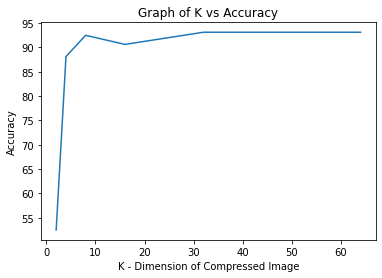

In [9]:
plt.plot(k,accu)
plt.xlabel('K - Dimension of Compressed Image')
plt.ylabel('Accuracy')
plt.title('Graph of K vs Accuracy')
plt.show()

In [10]:
# IMPOSTER IMAGE ADDITION
height = 64
width = 64

imgfiles = os.listdir(imgs)
# IMAGE RESIZING
for img in imgfiles:
    path = os.path.join(imgs,img)
    newPath = os.path.join(compr,img)
    image = Image.open(path)
    image = image.resize((height,width),Image.ANTIALIAS)
    image.save(newPath)
    
#REDUCTION AND CONSTRUCTION OF DATASET
output = []
outputID = {}
outputName = {}

inp = []
newImgFiles = os.listdir(compr)

for newImg in newImgFiles:
    imgPath = os.path.join(compr,newImg)
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    inp.append(image)
    
    name = newImg.split("_")[0]
    if(name not in outputID):
        var = len(outputID) + 1
        outputID[name] = var
        outputName[var] = name
    output.append(outputID[name])
    
output = np.array(output)
inp = np.array(inp)

mu = np.mean(inp,axis = 0)

# DIVIDING THE DATASET INTO TRAINING SET
trainingX = []
testingX = []
testingY = []
trainingY = []

# TRAINING SET = 60% & TESTING SET = 40%
trainSize = 60
sampleSize = int((trainSize/float(100))*inp.shape[0])
trainingIdx = random.sample(range(0,inp.shape[0]),sampleSize)

for i in range(inp.shape[0]):
    if(i in trainingIdx):
        trainingX.append(inp[i])
        trainingY.append(output[i])
    else:
        testingX.append(inp[i])
        testingY.append(output[i])
        
#IMPOSTER IMAGE
imposterPath = '/home/kartic/Documents/ML/PCA Assignment/imposter_NA.jpeg'
newImposterPath = '/home/kartic/Documents/ML/PCA Assignment/imposter_NA_compr.jpeg'
# NOTE : YOU HAVE TO CHANGE THE PATH ACCORDING TO YOUR DIRECTORY
imageImp = Image.open(imposterPath)
imageImp = imageImp.resize((height,width),Image.ANTIALIAS)
imageImp.save(newImposterPath)
imageImp = cv2.imread(newImposterPath)
imageImp = cv2.cvtColor(imageImp,cv2.COLOR_BGR2GRAY)
imageImp = imageImp.flatten()
testingX.append(imageImp)
testingY.append(404)
outputID['imposter'] = 404 #ERROR
outputName[404] = 'imposter'

        
trainingX = np.array(trainingX)
testingX = np.array(testingX)
testingY = np.array(testingY)
trainingY = np.array(trainingY)

# FEATURE SCALING
mutrain = np.mean(trainingX,axis = 0)
trainingX = trainingX - mutrain

xTestCompr = deepcopy(testingX)
mutest = np.mean(testingX,axis = 0)
testingX = testingX - mutest

# FINDING COVARIANCE MATRIX
cov = (1 / float(trainingX.shape[0])) * np.dot(np.transpose(trainingX), trainingX)

# FINDING THE OPTIMAL K VALUE
U,S,V = np.linalg.svd(cov)
totSum = 0
for i in range(S.shape[0]):
    totSum = totSum + S[i]
Sum = 0
for i in range(S.shape[0]):
    Sum = Sum + S[i]
    value = float(Sum)/float(totSum)
    if(value>= 0.99):
        K = i + 1
        break
        
# CALCULATION OF EIGEN VECTORS
EigenVect = []
for i in range(K):
    EigenVect.append(U[:,i])
EigenVect = np.array(EigenVect)

EigenFaces = np.dot(trainingX,np.transpose(EigenVect))
projectedData = np.dot(testingX,np.transpose(EigenVect))
trainingX = EigenFaces
testingX = projectedData

#TESTING

pred = []

for i in range(testingX.shape[0]):
    minDist = -1
    for j in range(trainingX.shape[0]):
        dist = np.linalg.norm(trainingX[j] - testingX[i])
        if(minDist == -1 or minDist > dist):
            minDist = dist
            lab = trainingY[j]
    pred.append(lab)
    
for i in range(testingX.shape[0]):
    print("Actual: " + outputName[testingY[i]] + " , Predicted: " + outputName[pred[i]])
    if(outputName[testingY[i]] == 'imposter'):
        print(outputName[testingY[i]],' is Not Enrolled Person')

Actual: s29 , Predicted: s29
Actual: s16 , Predicted: s16
Actual: s22 , Predicted: s22
Actual: s8 , Predicted: s8
Actual: s3 , Predicted: s3
Actual: s10 , Predicted: s10
Actual: s2 , Predicted: s2
Actual: s16 , Predicted: s16
Actual: s28 , Predicted: s17
Actual: s32 , Predicted: s2
Actual: s34 , Predicted: s34
Actual: s22 , Predicted: s22
Actual: s33 , Predicted: s33
Actual: s7 , Predicted: s7
Actual: s35 , Predicted: s35
Actual: s13 , Predicted: s13
Actual: s26 , Predicted: s26
Actual: s40 , Predicted: s40
Actual: s1 , Predicted: s1
Actual: s9 , Predicted: s9
Actual: s11 , Predicted: s11
Actual: s38 , Predicted: s38
Actual: s15 , Predicted: s15
Actual: s20 , Predicted: s20
Actual: s36 , Predicted: s36
Actual: s18 , Predicted: s5
Actual: s15 , Predicted: s15
Actual: s13 , Predicted: s13
Actual: s30 , Predicted: s30
Actual: s14 , Predicted: s14
Actual: s19 , Predicted: s19
Actual: s4 , Predicted: s4
Actual: s25 , Predicted: s25
Actual: s21 , Predicted: s21
Actual: s33 , Predicted: s33
A